# Machine Learning and Statistics: Tasks

Author: Daria Sep

***

## Task 1

### Description

***

Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such
as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number `x` without
using the power operator or a package.

Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01

$$ z_{i+1} = z_i - \frac{z_i*z_i - x}{2z_i} $$

### Solution

***

In [1]:
def sqrt(x):
    # Initial guess for the square root
    z = x / 2.0
    # Defining the threshold for convergence
    threshold = 0.01
    
    while True:
        # Calculating the next approximation using Newton's method formula
        z_next = z - (z * z - x) / (2 * z)
        
        # Checking if the difference between the current and next approximation is less than the threshold
        if abs(z_next - z) < threshold:
            break
        
        # Updating the current approximation
        z = z_next
    
    return z

### Tests

***

In [2]:
# Test the function on 101
x = 101.0
result = sqrt(x)
print(f"The square root of {x} is approximately {result}, rounded to 2 decimal points is {result:.2f}")

The square root of 101.0 is approximately 10.049925395190327, rounded to 2 decimal points is 10.05


In [3]:
# Test the function on 13
x = 13
result = sqrt(x)
print(f"The square root of {x} is approximately {result}, rounded to 2 decimal points is {result:.2f}")

The square root of 13 is approximately 3.6058779145461, rounded to 2 decimal points is 3.61


In [4]:
# Test the function on 24
x = 24
result = sqrt(x)
print(f"The square root of {x} is approximately {result}, rounded to 2 decimal points is {result:.2f}")

The square root of 24 is approximately 4.908512720156556, rounded to 2 decimal points is 4.91


### Notes

***

The provided code defines a Python function called `sqrt(x)` that calculates the square root of a given number `x` using the Newton's method for finding square roots. It iteratively refines an initial guess until it reaches a value that is within the specified threshold of accuracy. It's a numerical approximation technique commonly used in mathematics and engineering.

1. Function `sqrt(x)` that takes an argument `x` is defined.
2. A variable `z` is defined to half of `x` as the initial guess for the square root.
3. A `threshold` of `0.01` is set to determine when the approximation is considered sufficiently close to the actual square root.
4. A `while` loop is entered until the desired level of accuracy is achieved.
5. The next approximation is calculated using the Newton's method formula. The `z_next` is updated based on the current approximation `z` and the input value `x`.
6. If the difference is below `threshold`, the loop breaks, otherwise, `z` is updated to the value of `z_next` for the next iteration of the loop.
7. The final approximation is returned as the square root of `x`.

### References

***

Agrawal U. (2022). *Find root of a number using Newton’s method.* Available online at <https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/>

Markdown Guide (n.d.). *Basic Syntax - The Markdown elements outlined in the original design document.* Available online at <https://www.markdownguide.org/basic-syntax/#overview>

Strang G., Herman E. (2016). *Newton’s Method. Calculus Volume 1.* Available online at <https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/04%3A_Applications_of_Derivatives/4.09%3A_Newtons_Method>

***

## Task 2

### Description

***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use `scipy.stats` to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

| Drink/Biscuit| Chocolate | Plain |
| :----: | :----: | :----: |
| Coffee | 43 | 57 |
| Tea | 56 | 45 |

### Solution

***

#### Imports

In [5]:
# Dataframes
import pandas as pd

# Shuffles
import random

# Statistics
import scipy.stats as ss 

#### Data

In [6]:
coffee_chocolate = [['Coffee', 'Chocolate']] * 43
tea_chocolate = [['Tea', 'Chocolate']] * 56
coffee_plain = [['Coffee', 'Plain']] * 57
tea_plain = [['Tea', 'Plain']] * 45

# Merging four lists
raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain

# Shuffling the data
random.shuffle(raw_data)

# Zipping the list
drink, biscuit = list(zip(*raw_data))

# Creating a dataframe
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

df

,drink,biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Tea,Plain
3,Coffee,Plain
4,Tea,Chocolate
...,...,...
196,Tea,Plain
197,Tea,Plain
198,Tea,Plain
199,Coffee,Plain


#### Contingency table

In [7]:
cross = ss.contingency.crosstab(df['drink'], df['biscuit'])
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [8]:
cross.count

array([[43, 57],
       [56, 45]])

#### Chi Square Test

In [9]:
chi2, p, dof, expected = ss.chi2_contingency(cross.count, correction=False)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 3.113937364324669
P-value: 0.07762509678333357
Degrees of Freedom: 1
Expected Frequencies Table:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


#### Interpretation

In [10]:
# H0 (null hypothesis) states that there is no relation between the variables. 

alpha = 0.05
print("P-value is " + str(p))


if p <= alpha:
    print('Dependent (reject H0) \nThere is a significant association between "drink" and "biscuit".')
else:
    print('Independent (H0 holds true) \nThere is no significant association between "drink" and "biscuit".')

P-value is 0.07762509678333357
Independent (H0 holds true) 
There is no significant association between "drink" and "biscuit".


### Notes

***

1. Four lists (`coffee_chocolate`, `tea_chocolate`, `coffee_plain`, and `tea_plain`) are created, each containing pairs of "drink" and "biscuit" values, indicating frequencies.
2. These four lists are merged into a single list called `raw_data`.
3. The order of elements in the `raw_data` list is shuffled using `random.shuffle(raw_data)`, effectively randomising the dataset.
4. The `zip(*raw_data)` operation splits the pairs of "drink" and "biscuit" into two separate lists.
5. A pandas DataFrame `df` is created using these two lists, where "drink" and "biscuit" become columns in the DataFrame.
6. A contingency table `cross` is created using `ss.contingency.crosstab()` to count the occurrences of different combinations of "drink" and "biscuit" in the DataFrame.
7. The Chi-Square test is performed on the contingency table and the test statistics, p-value, degrees of freedom, and expected frequencies are printed.
8. The significance level (`alpha`) is set to 0.05, and the `p-value` is compared against `alpha` to determine whether there's a significant association between "drink" and "biscuit".
9. The interpretation of the Chi-Square test results is printed, indicating the independence between "drink" and "biscuit."

### References

***
Brownlee J. (2019). *A Gentle Introduction to the Chi-Squared Test for Machine Learning.* Available online at <https://machinelearningmastery.com/chi-squared-test-for-machine-learning/>

GeeksForGeeks (n.d.). *Python – Pearson’s Chi-Square Test.* Available online at <https://www.geeksforgeeks.org/python-pearsons-chi-square-test/>

Markdown Guide (n.d.). *Extended Syntax - Advanced features that build on the basic Markdown syntax.* Available online at <https://www.markdownguide.org/extended-syntax/#markdown-processors>

McLoughlin I. (2023). *Topic 2: Chi-Square Tests.* Atlantic Technological University. Online at <https://vlegalwaymayo.atu.ie/course/view.php?id=8770#coursecontentcollapse3>

Mulani S. (2021). *Chi-square test in Python — All you need to know!!* Available online at <https://www.askpython.com/python/examples/chi-square-test>

***

## Task 3

### Description

***

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

### Solution

***

#### Imports

In [11]:
# Dataframes
import pandas as pd

# Statistics
import scipy.stats as ss

# Plots
import matplotlib.pyplot as plt

#### Data

In [12]:
# Loading the penguins dataset into a DataFrame
penguins_df = pd.read_csv("csv/penguins.csv")

# Showing data
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [13]:
# Filtering the dataset for Gentoo penguins only
gentoo_df = penguins_df[penguins_df["species"] == "Gentoo"]

# Splitting the data into male and female groups
male_mass = gentoo_df[gentoo_df["sex"] == "MALE"]["body_mass_g"]
female_mass = gentoo_df[gentoo_df["sex"] == "FEMALE"]["body_mass_g"]

male_mass.head(), female_mass.head()

(221    5700.0
 223    5700.0
 224    5400.0
 227    5200.0
 229    5150.0
 Name: body_mass_g, dtype: float64,
 220    4500.0
 222    4450.0
 225    4550.0
 226    4800.0
 228    4400.0
 Name: body_mass_g, dtype: float64)

#### Histogram

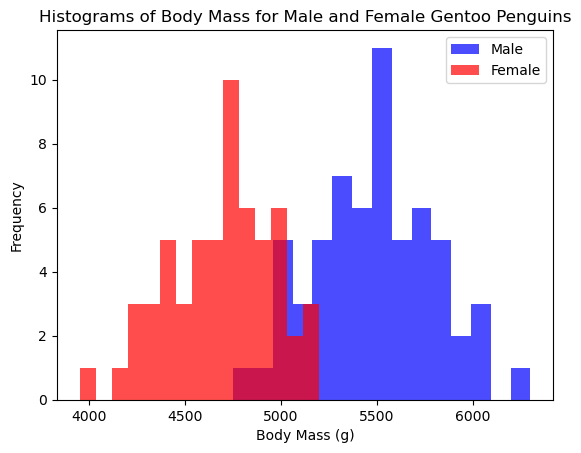

In [14]:
plt.hist(male_mass, bins=15, alpha=0.7, color="blue", label="Male")
plt.hist(female_mass, bins=15, alpha=0.7, color="red", label="Female")

plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Histograms of Body Mass for Male and Female Gentoo Penguins")
plt.legend()
plt.show()

#### t-Test

In [15]:
# Performing a two-sample t-test
t_statistic, p_value = ss.ttest_ind(male_mass, female_mass)

# Defining the significance level 
alpha = 0.05

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}\n")

# Checking if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is significant evidence of a difference in body mass between male and female Gentoo penguins.")
else:
    print("There is no significant evidence of a difference in body mass between male and female Gentoo penguins.")

t-statistic: 14.721676481405709
p-value: 2.133687602018886e-28

There is significant evidence of a difference in body mass between male and female Gentoo penguins.


### Notes

***

The code above Performs a t-test on the famous penguins dataset to investigate whether there is evidence of a significant difference in the body mass of male and female Gentoo penguins.

1. The penguins dataset is loaded from a CSV file named "penguins.csv" into a pandas DataFrame called `penguins_df`.
2. The dataset is filtered to include only Gentoo penguins. A new DataFrame called `gentoo_df` is created.
3. The data is split into male and female groups based on the "sex" column.
4. Histogram is generated to visualise the data. 
5. A two-sample t-test is performed using the `ttest_ind` function from the `scipy.stats` library to compare the body mass of male and female Gentoo penguins. The function calculates the t-statistic and the p-value.
6. A significance level (alpha) is set to 0.05 and the p-value is checked against alpha to determine if there is a significant difference between male and female penguin body masses.

### References

***
matplotlib (n.d). *matplotlib.pyplot.hist.* Available online at <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html>

McLoughlin I. (2023). *Topic 3: t-Tests.* Atlantic Technological University. Online at <https://vlegalwaymayo.atu.ie/course/view.php?id=8770#coursecontentcollapse4>

Mwaskom (2020). *seaborn-data: Data repository for seaborn examples.* Available online at <https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv>

SciPy Manual (n.d). *scipy.stats.ttest_ind.* Available online at <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html>

Suleiman A. (2022). *How To Perform The 5 Most Popular Statistical Analysis With Python.*  Available online at <https://python.plainenglish.io/how-to-perform-the-5-most-popular-statistical-analysis-with-python-ce9012c3be30>

***

## Task 4

### Description

***

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence
for your answer.

### Solution

***

#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#### Data

In [2]:
# Loading the iris dataset from a CSV file
iris_df = pd.read_csv('csv/iris.csv')

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Visual Analysis with Pairplot

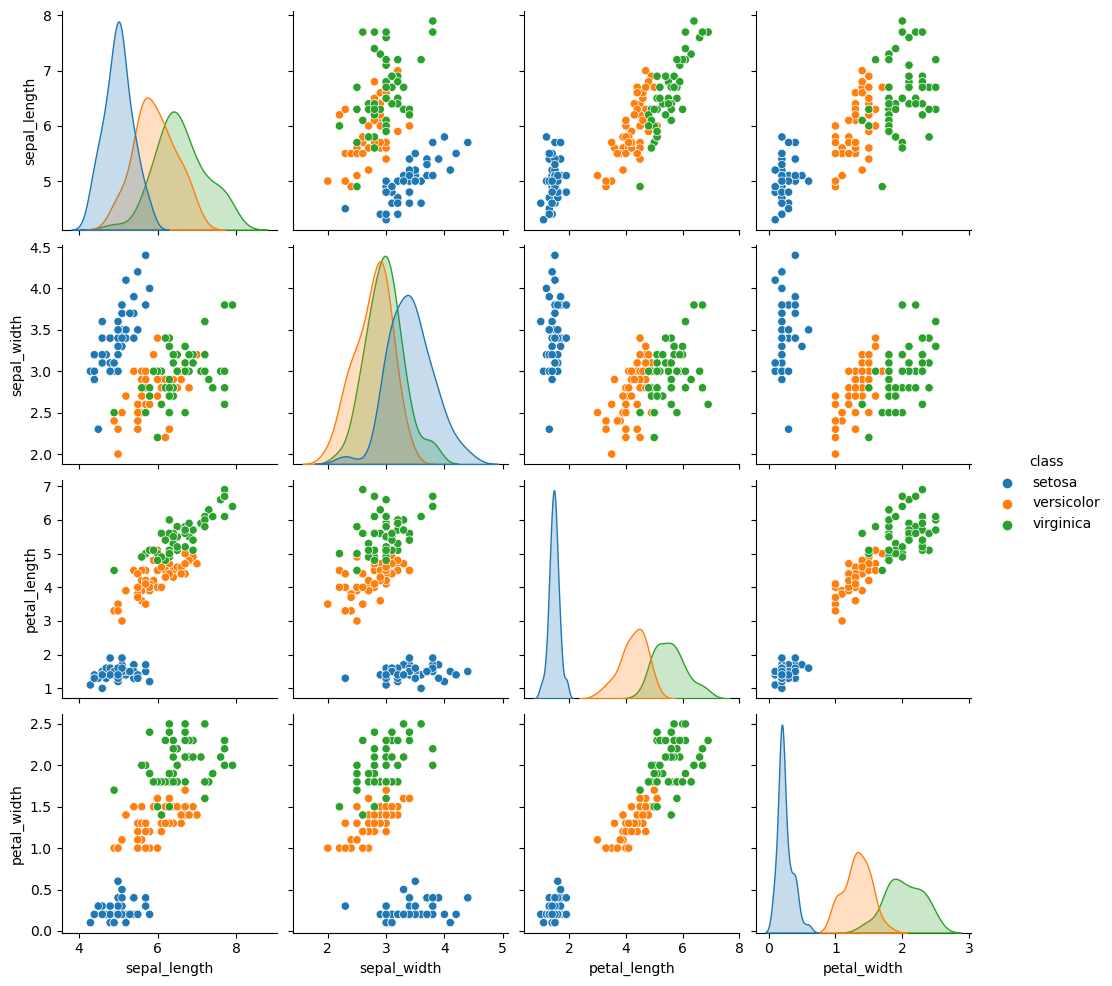

In [3]:
species_column = iris_df.columns[-1]

# Pairplot to visualise the distributions and relationships between features
sns.pairplot(iris_df, hue=species_column)
plt.show()


#### Classification with KNN and Cross-Validation

In [5]:
X = iris_df.iloc[:, :-1]  # Features
y = iris_df.iloc[:, -1]   # Target labels
knn = KNeighborsClassifier(n_neighbors=3)

# Performing 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)

# Calculating the mean and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2%}")
print(f"Standard Deviation: {std_deviation:.2%}")

Mean Accuracy: 96.67%
Standard Deviation: 2.11%


#### Results Interpretation

The Setosa species in the Iris dataset is easily separable from the Versicolor and Virginica species, particularly when considering petal dimensions. Setosa's distinct clustering, demonstrated in various feature combinations like petal length versus petal width and petal length versus sepal length, highlights its smaller petal dimensions. This pronounced difference emphasizes the effectiveness of these features for effective classification among the three species, with Setosa's unique characteristics making it clearly stand out. 

The subsequent analysis indicates that the KNN classifier, with 3 neighbours, performs very well on the Iris dataset. The high average accuracy suggests that the classifier is effective in distinguishing between the different species of Iris, including the Setosa class. The consistency of this performance, as shown by the relatively low standard deviation in cross-validation scores, confirms the earlier visual analysis findings. This consistency underscores the sensitivity of the KNN algorithm to feature separability, reinforcing the visual observation of Setosa's distinct separability.​

### Notes

***

The code above both visualises and statistically evaluates the Iris dataset by combining data visualisation techniques with machine learning model validation. 

1. The Iris dataset is loaded from a CSV file using Pandas' `read_csv` function.
2. The last column in the dataframe is identified as the species column, which will be used for colour-coding in the pairplot.
3. Seaborn's pairplot function is used to create a pairplot of the dataset. This plot provides a pairwise relationship visualisation of all features in the dataset, with different species indicated by different colours.

4. The dataset is split into features (`x`) and target labels (`y`), with `y` being the last column (species).
5. A KNN classifier is created with 3 neighbours using `scikit-learn`'s `KNeighborsClassifier`.
6. The classifier's performance is evaluated using 5-fold cross-validation with `cross_val_score`, providing a more robust assessment than a single train-test split.
7. It the mean accuracy and standard deviation of the cross-validation scores are calculated and printed, providing insights into the model's performance and consistency.

### References

***


McLoughlin I. (2023). *Topic 4: k Nearest Neighbours.* Atlantic Technological University. Online at <https://vlegalwaymayo.atu.ie/course/view.php?id=8770#coursecontentcollapse5>

Oumimoun K. (2021). *Machine Learning: Iris Data Set K-Nearest Neighbor (KNN).* Available online at <https://khalil-o.medium.com/machine-learning-iris-data-set-k-nearest-neighbor-knn-db3382736933>

scikit-learn (n.d.). *sklearn.model_selection.cross_val_score.* Available online at <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html>

scikit-learn (n.d.). *sklearn.neighbors.KNeighborsClassifier.* Available online at <https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html>

Seaborn (n.d.). *seaborn.pairplot.* Available online at <https://seaborn.pydata.org/generated/seaborn.pairplot.html>

Shafi A. (2023). *K-Nearest Neighbors (KNN) Classification with scikit-learn.* Available online at <https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn>

## Task 5

### Description

***

Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose
of the analysis and your results.

### Solution

***

#### Imports

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### Data

In [21]:
iris_df = pd.read_csv('csv/iris.csv')

X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

#### PCA

In [22]:
# Performing PCA to reduce dimensions to two
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = y

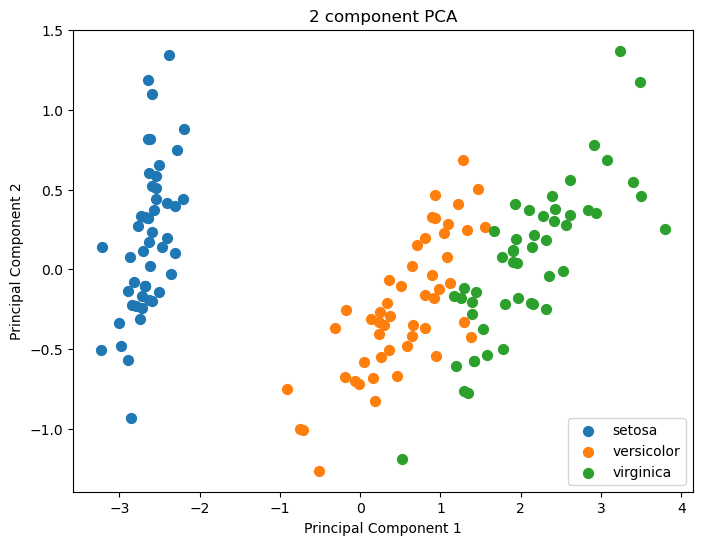

In [23]:
# Visualising the PCA results
plt.figure(figsize=(8, 6))
for species in pca_df['species'].unique():
    subset = pca_df[pca_df['species'] == species]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], s = 50, label = species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.legend()
plt.show()

In [24]:
# Explaining the variance ratio
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.92461621, 0.05301557])

#### Results

The Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a smaller number of dimensions while retaining as much variance (information) as possible. It helps in simplifying the dataset, reducing computational costs, and often makes it easier to visualise and understand high-dimensional data. The PCA on the Iris dataset, reduced to two dimensions, revealed following insights:

1. The scatter plot shows the distribution of the Iris dataset along the first two principal components. Each dot represents an Iris flower, and they are colour-coded by species. The PCA has projected the original data (which had four dimensions: sepal length, sepal width, petal length, and petal width) down to two principal components.

2. The first principal component explains about 92.46% of the variance, and the second component accounts for approximately 5.30%. Together, they account for about 97.76% of the total variance in the dataset. This high percentage indicates that reducing the dimensions to two captures most of the variability in the data.

3. From the scatter plot, we can observe how the different species are distributed relative to these two principal components. The PCA has enabled a clear separation between the species, especially the Setosa species, which is distinctly separated from Versicolor and Virginica. The effectiveness of PCA in this context demonstrates its utility in feature extraction and simplification for classification tasks.

Overall, PCA has successfully reduced the dimensionality of the Iris dataset while retaining most of the information, as evidenced by the explained variance ratio and the clear separation of species in the scatter plot.

### Notes

***

The code above performs Principal Component Analysis (PCA) on the Iris dataset, which has been reduced to two dimensions for analysis. 
The purpose of this PCA is to reduce the dimensionality of the data for easier visualisation and analysis while retaining most of the information.

1. The dataset is loaded from a CSV file.
2. PCA is performed using `PCA(n_components=2)`, reducing the dataset to two dimensions.
3. `fit_transform` is applied to the feature set to calculate the principal components.
4. A new DataFrame `pca_df` is created to store the PCA results with columns named 'Principal Component 1' and 'Principal Component 2'.
5. The species column from the original dataset is appended to this DataFrame for visualisation purposes.
6. A scatter plot is created using matplotlib.pyplot.
7. The explained variance of each principal component is retrieved using `pca.explained_variance_ratio_`. This shows the proportion of the dataset's variance that lies along each principal component.

The explained variance suggests that these two components capture a significant portion of the data's variance.
The scatter plot gives a visual representation of how well the species are separated when projected onto these new axes.

### References

***

matplotlib (n.d.). *matplotlib.pyplot.scatter.* Available online at <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html>

scikit-learn (n.d.). *Decomposing signals in components (matrix factorization problems).* Available online at <https://scikit-learn.org/stable/modules/decomposition.html#decomposing-signals-in-components-matrix-factorization-problems> 

scikit-learn (n.d.). *sklearn.decomposition.PCA.* Available online at <https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

Sharma A. (2020). *Principal Component Analysis (PCA).* Available online at <https://www.datacamp.com/tutorial/principal-component-analysis-in-python> 

VanderPlas J. (2016). *Python Data Science Handbook: Essential Tools for Working with Data.* Available online at <https://jakevdp.github.io/PythonDataScienceHandbook/>

***

## End